# Weather in SZEGED

****

A Kaggle dataset with the main objective is to find the factors having an impact on the weather conditions. The CSV file includes an hourly/daily summary for Szeged, Hungary area, between 2006 and 2016.

In [188]:
#basic packages for our usage
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "whitegrid", palette = "inferno")

import os
import warnings

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split as TTS
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
warnings.filterwarnings("ignore")

In [189]:
main_data = pd.read_csv("weatherHistory.csv")
main_data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [190]:
main_data.describe(include = "all")

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
count,96453,96453,95936,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000,96453
unique,96429,27,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214
top,2010-08-02 19:00:00.000 +0200,Partly Cloudy,rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mostly cloudy throughout the day.
freq,2,31733,85224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20085
mean,NaN,NaN,NaN,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956,NaN
std,NaN,NaN,NaN,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906,NaN
min,NaN,NaN,NaN,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN
25%,NaN,NaN,NaN,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000,NaN
50%,NaN,NaN,NaN,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000,NaN
75%,NaN,NaN,NaN,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000,NaN


In [191]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


#### Some basic inferences -
- Our data has **96453 rows × 12 columns**.
- Column names should be converted to lower case to avoid confusion.
- No sign of potential outliers, must be confirmed by visualizations.
- We have to deal with **8 numerical** and **4 categorical** columns.

## EDA

### Analysing the target variable 
##### (Temperature)

In [192]:
#converting all the columns into lowercase
main_data.columns = main_data.columns.str.lower()

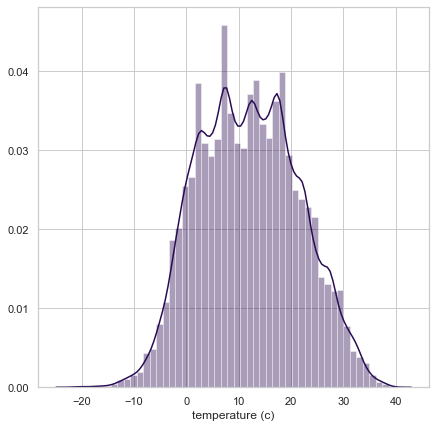

In [193]:
#normal distribution of the target variable
plt.figure(figsize = (7, 7))
sns.distplot(main_data["temperature (c)"])
plt.show()

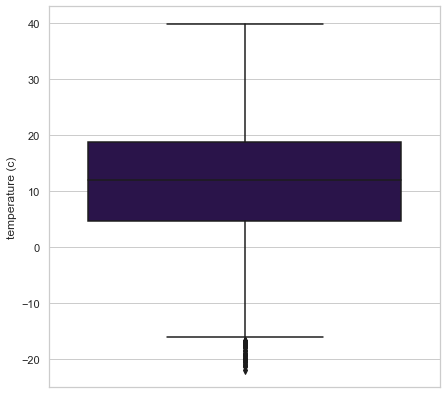

In [194]:
#boxplot 
plt.figure(figsize = (7, 7))
sns.boxplot(main_data["temperature (c)"], orient = "vertical")
plt.show()

#### Numerical variables

In [195]:
data_vars = [int, float]
num_vars = main_data.select_dtypes(include = data_vars)
num_vars = num_vars.iloc[:,1:]
num_vars.columns

Index(['apparent temperature (c)', 'humidity', 'wind speed (km/h)',
       'wind bearing (degrees)', 'visibility (km)', 'loud cover',
       'pressure (millibars)'],
      dtype='object')



***Distribution plot of apparent temperature (c)***


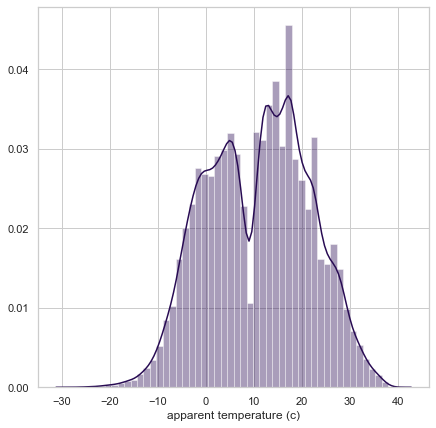



***Boxplot of apparent temperature (c)***


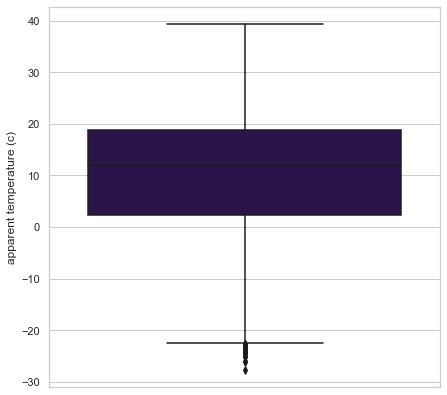



***Scatterplot of apparent temperature (c) vs temperature***


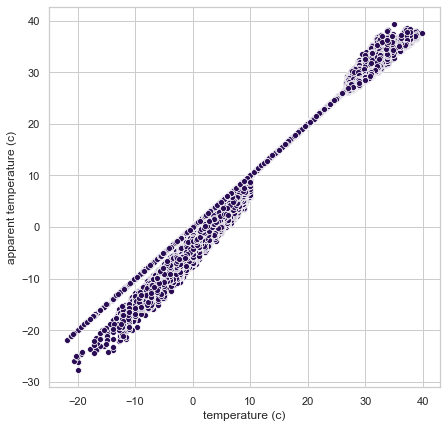



***Distribution plot of humidity***


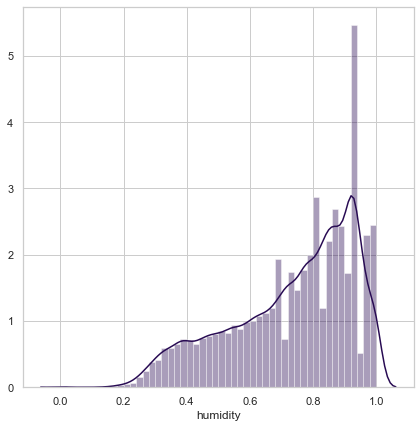



***Boxplot of humidity***


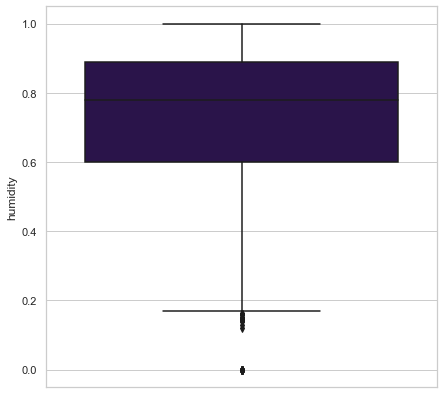



***Scatterplot of humidity vs temperature***


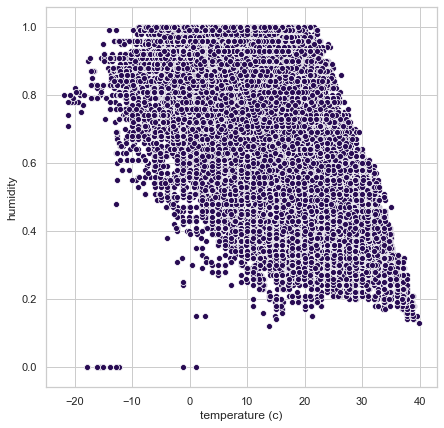



***Distribution plot of wind speed (km/h)***


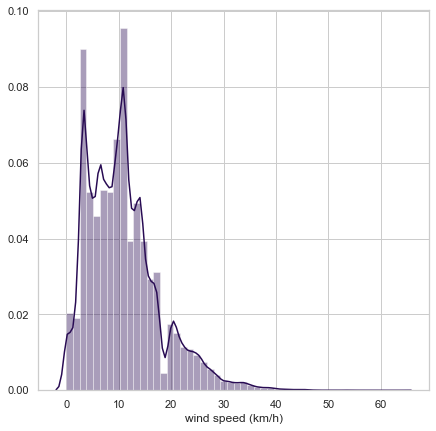



***Boxplot of wind speed (km/h)***


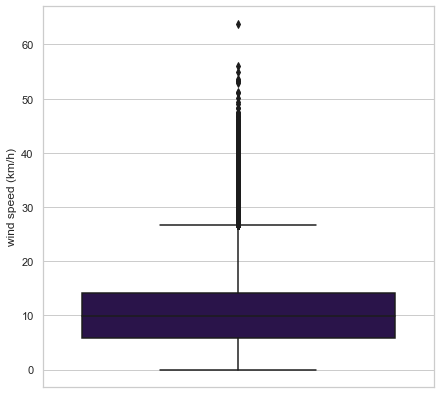



***Scatterplot of wind speed (km/h) vs temperature***


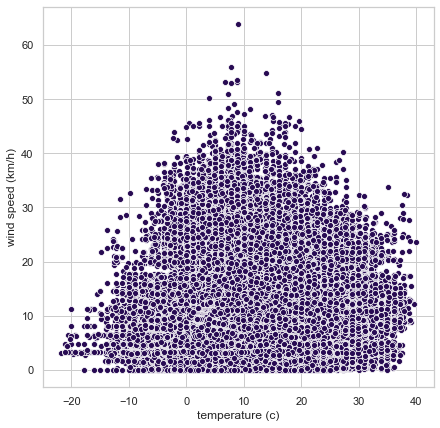



***Distribution plot of wind bearing (degrees)***


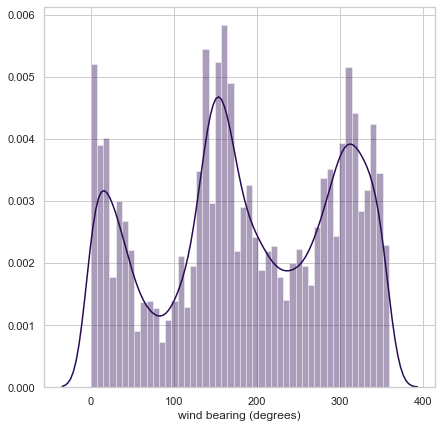



***Boxplot of wind bearing (degrees)***


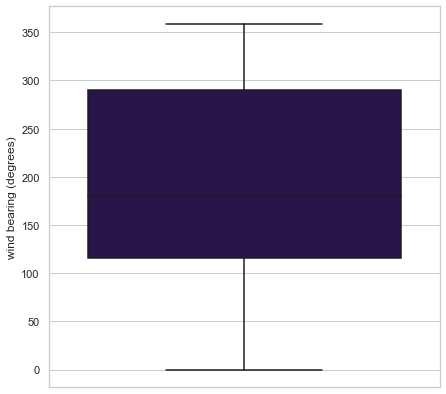



***Scatterplot of wind bearing (degrees) vs temperature***


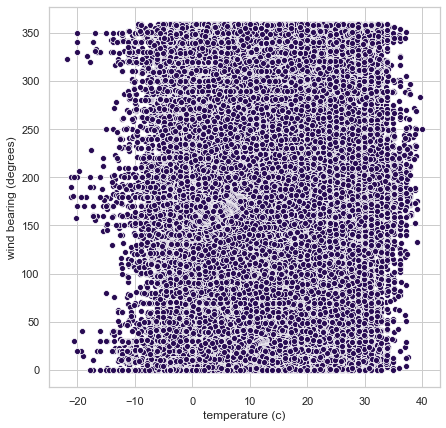



***Distribution plot of visibility (km)***


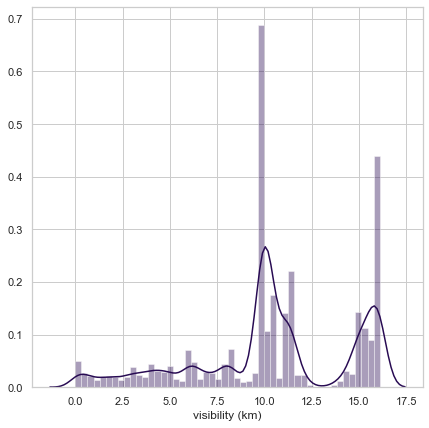



***Boxplot of visibility (km)***


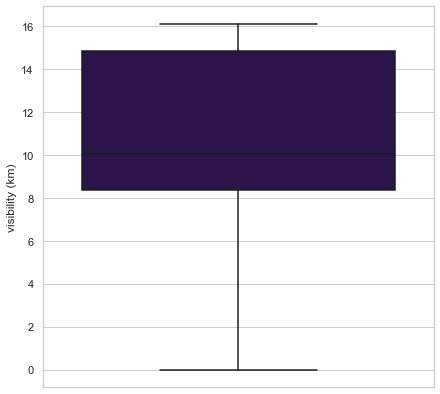



***Scatterplot of visibility (km) vs temperature***


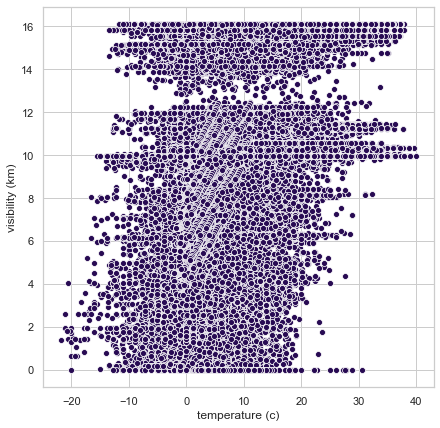



***Distribution plot of loud cover***


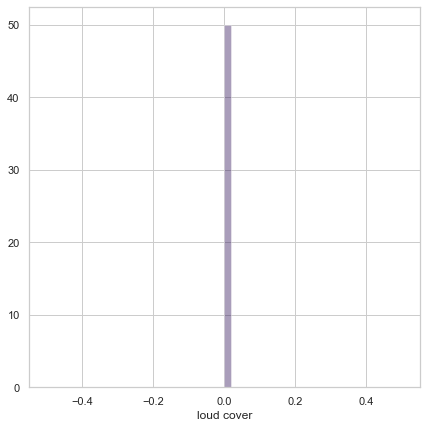



***Boxplot of loud cover***


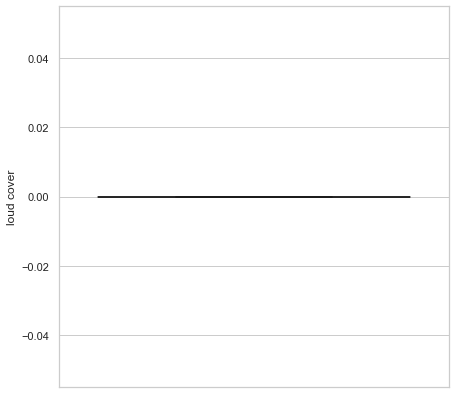



***Scatterplot of loud cover vs temperature***


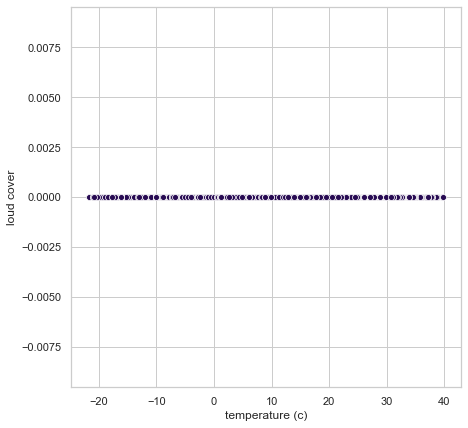



***Distribution plot of pressure (millibars)***


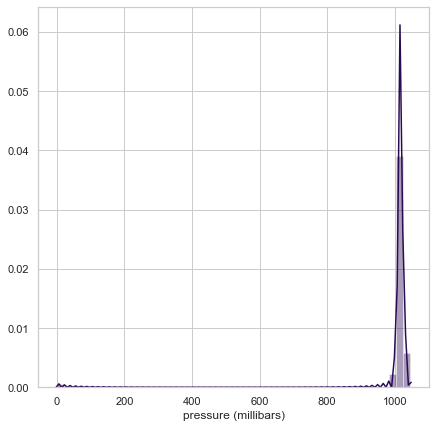



***Boxplot of pressure (millibars)***


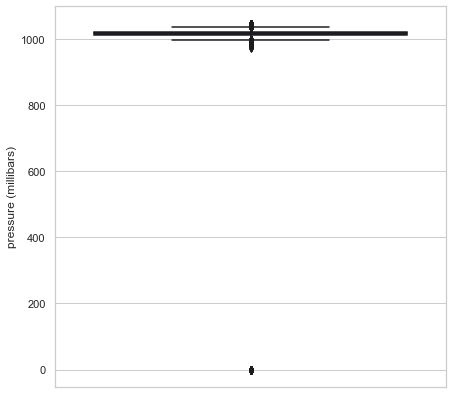



***Scatterplot of pressure (millibars) vs temperature***


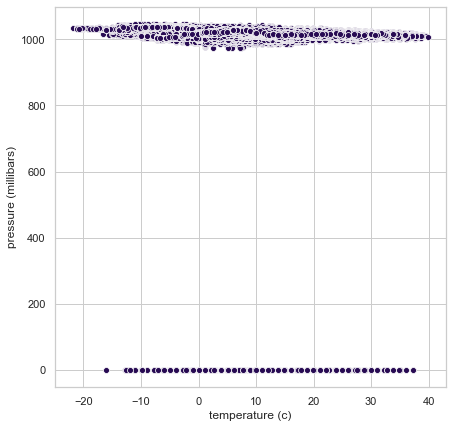

In [196]:
#plots of each numerical variable

for i in num_vars:
    
    print("\n\n***Distribution plot of {}***".format(i))
    plt.figure(figsize = (7, 7))
    sns.distplot(main_data[i])
    plt.show()
    
    print("\n\n***Boxplot of {}***".format(i))
    plt.figure(figsize = (7, 7))
    sns.boxplot(main_data[i], orient = "vertical")
    plt.show()
    
    print("\n\n***Scatterplot of {} vs temperature***".format(i))
    plt.figure(figsize = (7, 7))
    sns.scatterplot(main_data["temperature (c)"], main_data[i])
    plt.show()

#### Basic insights - 
- **apparent temperature** has a linear relationship with our target variable, slight outliers but workable, bell curve dist.
- **humidity** seems to have an inverse proportionality with our target variable and a negative skewness (left tailing).
- **wind speed** is having outliers which might need some treatment, positive skewness (right tailing), it looks like **high** wind speed (>40 km/h) is observed during **moderate** temperatures (0-30C) while both **extremes** of temperature (<0C & >30C) observes low wind speed (<20 km/h).
- Other variables doesnt have a skewness and outlier issue, neither they seem to have any relation with our target variable. **loud cover** column needs to be removed, as it has only 0.0 value.
- **pressure** variable needs to be considered for further analysis during feature processing because it includes 0 as a value which is quite ridiculous because pressure here means **air pressure** which can be zero only in vacuum and humans cannot survive in there.

In [197]:
# plt.figure(figsize = (7, 7))
# sns.scatterplot(main_data["humidity"], main_data["wind speed (km/h)"])
# plt.show()

#### Categorical Variables

In [198]:
cat_vars = main_data.select_dtypes(exclude = data_vars)
cat_vars.columns

Index(['formatted date', 'summary', 'precip type', 'daily summary'], dtype='object')

In [199]:
cat_vars

,formatted date,summary,precip type,daily summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,Partly cloudy throughout the day.
...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,Partly cloudy starting in the morning.


In [200]:
cat_vars["daily summary"].value_counts() #might be deleting this column

Mostly cloudy throughout the day.                                                                                   20085
Partly cloudy throughout the day.                                                                                    9981
Partly cloudy until night.                                                                                           6169
Partly cloudy starting in the morning.                                                                               5184
Foggy in the morning.                                                                                                4201
                                                                                                                    ...  
Breezy starting overnight continuing until afternoon and foggy starting in the morning continuing until evening.       24
Breezy starting overnight continuing until morning and foggy overnight.                                                24
Partly cloudy starting o

In [201]:
cat_vars["precip type"].value_counts()

rain    85224
snow    10712
Name: precip type, dtype: int64

In [202]:
#ratio w.r.t all the rows
(cat_vars["precip type"].value_counts()/len(main_data))*100

rain    88.358060
snow    11.105927
Name: precip type, dtype: float64

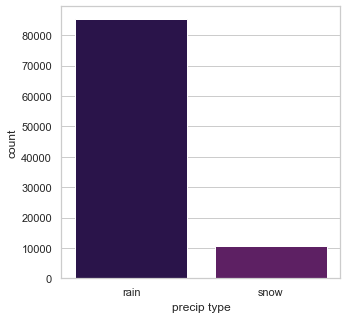

In [203]:
#just the frequency plot
plt.figure(figsize = (5, 5))
sns.countplot(main_data["precip type"])
plt.show()

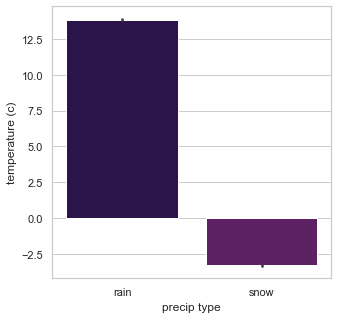

In [204]:
#affect on the temperature
plt.figure(figsize = (5, 5))
sns.barplot(main_data["precip type"], main_data["temperature (c)"])
plt.show()

In [205]:
cat_vars["summary"].value_counts()

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Windy and Mostly Cloudy                   35
Breezy and Foggy                          35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

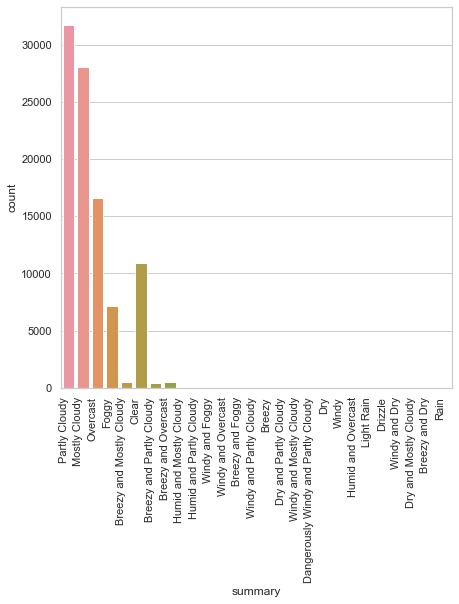

In [206]:
#frequency plot
plt.figure(figsize = (7, 7))
sns.countplot(cat_vars["summary"])
plt.xticks(rotation = 90, horizontalalignment = "right")
#figure.set_xticklabels(plt.get_xticklabels(), rotation = 65, horizontalalignment = "right")
plt.show()

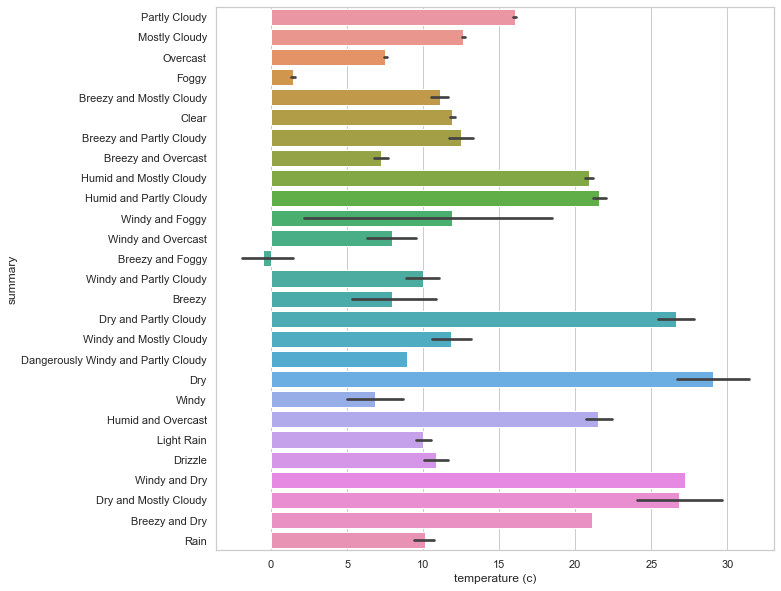

In [207]:
#how the variable actually affects the temperature
plt.figure(figsize = (10, 10))
sns.barplot(main_data["temperature (c)"], cat_vars["summary"])
#plt.xticks(rotation = 90, horizontalalignment = "right")
plt.show()

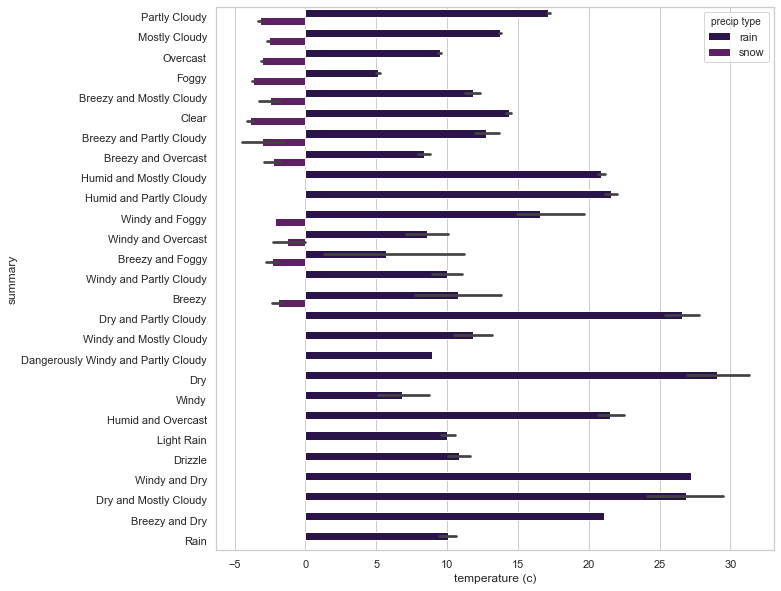

In [208]:
plt.figure(figsize = (10, 10))
sns.barplot(main_data["temperature (c)"], cat_vars["summary"], hue = main_data["precip type"])
#plt.xticks(rotation = 90, horizontalalignment = "right")
plt.show()

#### Few inferences from the above analysis - 
- There are 4 categorical columns, out of which **daily summary** column must be excluded from our analysis, because it has alot of unique values which is not making sense for our purpose, also the **summary** column is enough which tells the same thing in lesser detail and with which we can work out barring the complexity.

- The **precip type** column categorises the type of precipitation it is - Rain or Snow, by analysing our data the frequency of Rain is significantly greater than Snow (**rain: 88.35% | snow: 11.106%**). 

- **summary** variable has alot of classes, for this to be usable the sparse classes needs to be summed into "others" category otherwise it will be adding onto alot of columns. 

- Although, even the sparse classes are having an impact on the temperature but I think that effect is correlated with **precip type** variable which makes sense then. As, for ex., if the weather condition is **partly cloudy** and it snows that means the temperature got to be **<0C** or if it rains, it would mean the temperature is **>0C**. It can also be other way around but I am looking at it w.r.t our target variable's point of view. 

- A correlation plot needs to be done below, alongwith further analysis with the **formatted date** variable in feature processing section to maybe use it in some other form because currently it's hard to derive any insights using it.

## Feature Processing

### Missing value treatment *(if any)*

In [209]:
main_data.isnull().sum()

formatted date                0
summary                       0
precip type                 517
temperature (c)               0
apparent temperature (c)      0
humidity                      0
wind speed (km/h)             0
wind bearing (degrees)        0
visibility (km)               0
loud cover                    0
pressure (millibars)          0
daily summary                 0
dtype: int64

In [210]:
print("% of missing values in precip type column: {:.2f}%".format((main_data["precip type"].isnull().sum()/len(main_data))*100))

% of missing values in precip type column: 0.54%


In [211]:
#removing the rows having missing values 
main_data.dropna(axis = 0, inplace = True)

In [212]:
main_data["pressure (millibars)"].value_counts()

0.00       1288
1017.70     123
1015.00     119
1015.80     118
1016.70     117
           ... 
1045.32       1
994.25        1
1039.15       1
1042.57       1
993.17        1
Name: pressure (millibars), Length: 4971, dtype: int64

In [213]:
print("% of values having 0 pressure: {:.2f}%"
      .format((len(main_data[main_data["pressure (millibars)"] == 0.0])/len(main_data))*100))

% of values having 0 pressure: 1.34%


In [214]:
#number of rows we will be left with
len(main_data) - len(main_data[main_data["pressure (millibars)"] == 0.0])

94648

In [215]:
#removing the rows with 0 pressure values
main_data = main_data[main_data["pressure (millibars)"] > 0.0]

##### Plotting the pressure graph again

***Distribution plot of Pressure***


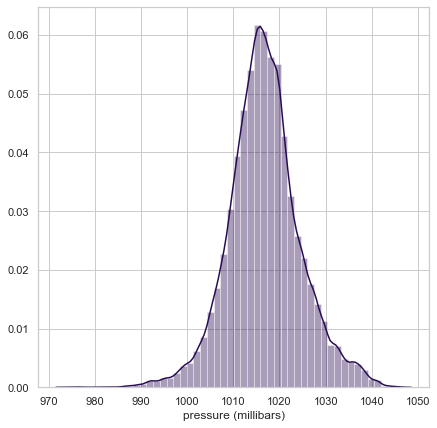

In [216]:
print("***Distribution plot of Pressure***")
plt.figure(figsize = (7, 7))
sns.distplot(main_data["pressure (millibars)"])
plt.show()    

***Boxplot of pressure***


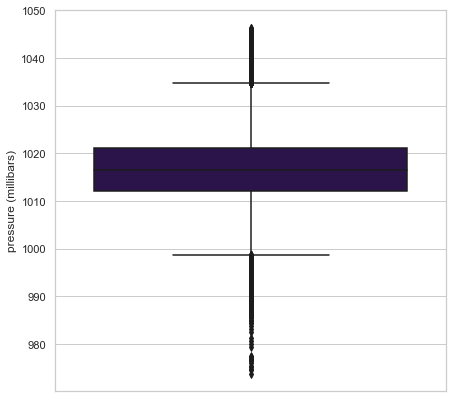

In [217]:
print("***Boxplot of pressure***")
plt.figure(figsize = (7, 7))
sns.boxplot(main_data["pressure (millibars)"], orient = "vertical")
plt.show()

***Scatterplot of pressure vs temperature***


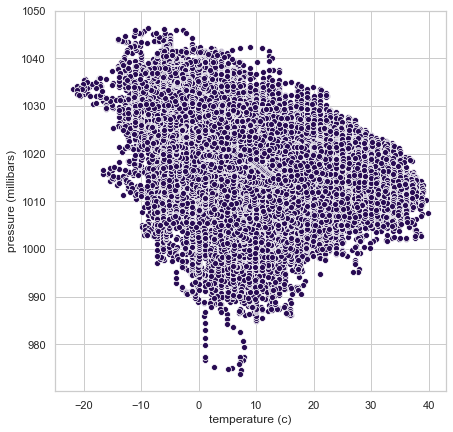

In [218]:
print("***Scatterplot of pressure vs temperature***")
plt.figure(figsize = (7, 7))
sns.scatterplot(main_data["temperature (c)"], main_data["pressure (millibars)"])
plt.show()

#### Inference -
- Normal distribution of the pressure variable is looking better than before now, pretty usable.
- Boxplot is showing some outliers, will not be processing them right now.
- Scatter plot with temperature is showing a slight inverse relation but its not a clear depiction. According to my hypothesis, pressure might be having a correlation with some other variable (must be humidity or wind speed).

##### Analysing "formatted date" column

In [219]:
#creating a new datetime column by trimming the last few values,
#finally converting it into datetime format
from datetime import datetime
main_data["new_datetime"] = main_data["formatted date"].apply(lambda i: i.rsplit(".", 1)[0])
main_data["new_datetime"] = main_data["new_datetime"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

In [220]:
#creating new columns for each - day, month, year and hour
main_data["day"] = main_data["new_datetime"].apply(lambda i: i.strftime("%d"))
main_data["month"] = main_data["new_datetime"].apply(lambda i: i.strftime("%B"))
main_data["year"] = temp = main_data["new_datetime"].apply(lambda i: i.strftime("%Y"))
main_data["hour"] = main_data["new_datetime"].apply(lambda i: i.strftime("%H"))

In [221]:
main_data.head()

,formatted date,summary,precip type,temperature (c),apparent temperature (c),humidity,wind speed (km/h),wind bearing (degrees),visibility (km),loud cover,pressure (millibars),daily summary,new_datetime,day,month,year,hour
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-04-01 00:00:00,01,April,2006,00
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-04-01 01:00:00,01,April,2006,01
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01 02:00:00,01,April,2006,02
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01 03:00:00,01,April,2006,03
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01 04:00:00,01,April,2006,04


#### Visualizing the date columns

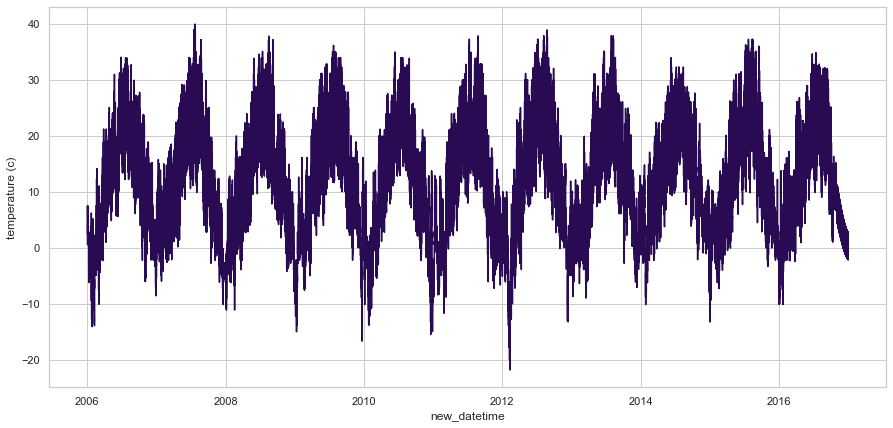

In [223]:
#year vs temperature plot
plt.figure(figsize = (15, 7))
sns.lineplot(main_data["new_datetime"], main_data["temperature (c)"])
plt.show()

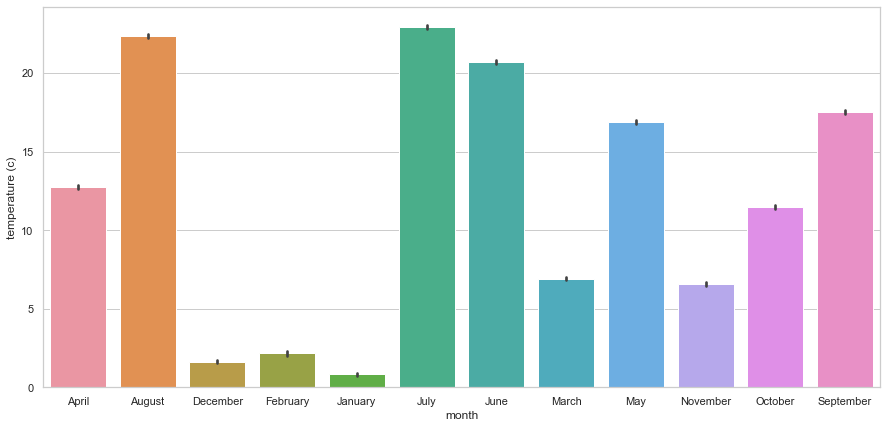

In [224]:
#monthly temperatures
plt.figure(figsize = (15, 7))
sns.barplot(main_data["month"], main_data["temperature (c)"])
plt.show()

In [225]:
# temp = main_data.set_index("new_datetime")
# temp

In [226]:
# monthly = temp.resample(rule = "M").mean()
# monthly

In [227]:
month_temp = main_data.groupby("month")["temperature (c)"].mean().sort_values(ascending = True)
month_temp

month
January       0.812841
December      1.613408
February      2.150587
November      6.572263
March         6.913849
October      11.451867
April        12.758799
May          16.862966
September    17.492626
June         20.683731
August       22.362501
July         22.942466
Name: temperature (c), dtype: float64

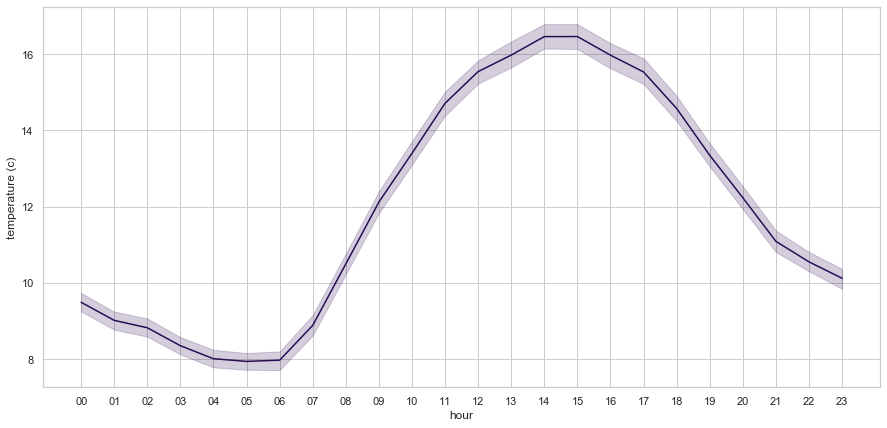

In [228]:
#hourly average temperature over the years
plt.figure(figsize = (15, 7))
sns.lineplot(main_data["hour"], main_data["temperature (c)"])
plt.show()

In [229]:
month_temp = main_data.groupby("hour")["temperature (c)"].mean() #.sort_values(ascending = True)
month_temp

hour
00     9.490079
01     9.016291
02     8.822431
03     8.351333
04     8.010382
05     7.940206
06     7.972164
07     8.885637
08    10.498097
09    12.120489
10    13.399110
11    14.711472
12    15.542211
13    15.975432
14    16.459755
15    16.460876
16    15.972655
17    15.532313
18    14.574220
19    13.344656
20    12.233583
21    11.088512
22    10.551282
23    10.120694
Name: temperature (c), dtype: float64

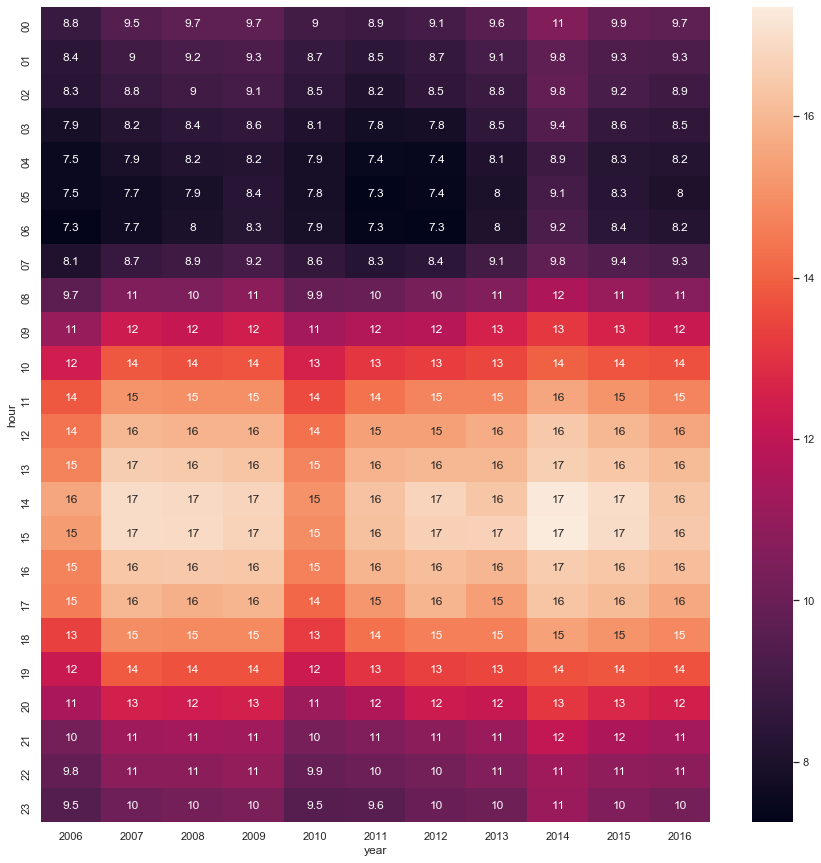

In [230]:
#hour-wise average temperature over the years
dummy = main_data.set_index("hour")
plt.figure(figsize = (15, 15))
sns.heatmap(dummy.reset_index().pivot_table(index = "hour", columns = "year", values = "temperature (c)", aggfunc = "mean"),
            annot = True)
plt.show()

#### inferences over this -
- **Year over year** analysis seems to show a seasonality, which is obvious as the same seasons repeat all through the years. Although, on the basis of this info we can predict a temperature range about a particular time frame.

- Basically, the datetime column **doesn't seem to have a direct impact** over the temperature. It just depicts the pattern of seasonality and the conventional temperature range that is supposed to exist on the basis of past cyclic phenomenon.

##### Note: Since our end goal is to find variables having a significant impact on our target variable, slight skewness and outliers are not processed at the moment because feature scaling and correlation are more important for our desired goal.

In [231]:
#removing - formatted date, daily summary, loud cover, new_datetime
main_data.drop(["formatted date", "loud cover", "daily summary", "new_datetime"], axis = 1, inplace = True)

In [232]:
#converting some varibles to integer
main_data["day"] = main_data["day"].astype(str).astype(int)
main_data["year"] = main_data["year"].astype(str).astype(int)
main_data["hour"] = main_data["hour"].astype(str).astype(int)

In [233]:
main_data

,summary,precip type,temperature (c),apparent temperature (c),humidity,wind speed (km/h),wind bearing (degrees),visibility (km),pressure (millibars),day,month,year,hour
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,1,April,2006,0
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,1,April,2006,1
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,1,April,2006,2
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,1,April,2006,3
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,1,April,2006,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,9,September,2016,19
96449,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,9,September,2016,20
96450,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,9,September,2016,21
96451,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,9,September,2016,22


In [234]:
#converting categorical variables to dummies
dum_data = pd.get_dummies(main_data)
dum_data

,temperature (c),apparent temperature (c),humidity,wind speed (km/h),wind bearing (degrees),visibility (km),pressure (millibars),day,year,hour,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,1,2006,0,...,0,0,0,0,0,0,0,0,0,0
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,1,2006,1,...,0,0,0,0,0,0,0,0,0,0
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,1,2006,2,...,0,0,0,0,0,0,0,0,0,0
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,1,2006,3,...,0,0,0,0,0,0,0,0,0,0
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,1,2006,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,9,2016,19,...,0,0,0,0,0,0,0,0,0,1
96449,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,9,2016,20,...,0,0,0,0,0,0,0,0,0,1
96450,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,9,2016,21,...,0,0,0,0,0,0,0,0,0,1
96451,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,9,2016,22,...,0,0,0,0,0,0,0,0,0,1


In [235]:
#top 10 correlated vars with target var
corr_dat = dum_data.corr()
print("***Top 10 Positively correlated feats***\n\n", corr_dat["temperature (c)"].sort_values(ascending = False)[:11])
print("\n\n***Top 10 Negatively correlated feats***\n\n", corr_dat["temperature (c)"].sort_values()[:10])

***Top 10 Positively correlated feats***

 temperature (c)             1.000000
apparent temperature (c)    0.992659
precip type_rain            0.563141
visibility (km)             0.393299
month_July                  0.352116
month_August                0.332784
summary_Partly Cloudy       0.300962
month_June                  0.273820
month_September             0.173308
hour                        0.170031
month_May                   0.156177
Name: temperature (c), dtype: float64


***Top 10 Negatively correlated feats***

 humidity               -0.632669
precip type_snow       -0.563141
month_January          -0.355858
month_December         -0.326300
summary_Foggy          -0.311947
pressure (millibars)   -0.310364
month_February         -0.297843
summary_Overcast       -0.213683
month_November         -0.169139
month_March            -0.160845
Name: temperature (c), dtype: float64


In [236]:
#splitting the data into x and y
y  = dum_data.iloc[: ,0].values
x = dum_data.iloc[: , 1:]

x_data = pd.DataFrame(x)

#### Scaling the split

In [361]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x_data.values)
scaled_y = scaler.fit_transform(y.reshape(-1, 1))
scaled_frame = pd.DataFrame(scaled_data, columns = x_data.columns)

In [376]:
scaled_frame = scaled_frame.drop(["visibility (km)"], axis = 1)
scaled_frame

,apparent temperature (c),humidity,wind speed (km/h),pressure (millibars)
0,-0.326613,0.791928,0.484305,-0.215090
1,-0.341660,0.638744,0.505307,-0.150739
2,-0.140864,0.791928,-0.992865,-0.110841
3,-0.461515,0.485561,0.481971,-0.050351
4,-0.365009,0.485561,0.038587,-0.037481
...,...,...,...,...
94643,1.413101,-1.556886,0.031586,-0.314191
94644,1.279237,-1.301580,-0.099096,-0.211229
94645,1.041602,-0.893091,-0.260114,-0.146878
94646,0.993349,-0.688846,-0.036088,-0.109554


## Statistical modeling

In [393]:
#splitting the data into train and test and fitting the model
x_train, x_test, y_train, y_test = TTS(scaled_frame, scaled_y, test_size = 0.3, random_state = 24)
LR = LinearRegression()
model = LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
pred_data = pd.DataFrame(y_pred)

In [397]:
#R-squared on train
print("{:.2f}".format((LR.score(x_train, y_train))*100))

99.03


In [398]:
#R-squared on test
print("{:.2f}".format((LR.score(x_test, y_test))*100))

99.04


In [399]:
#adding the constant for ANOVA
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

In [400]:
x_train_xt = pd.DataFrame(x_train)

In [401]:
#fitting the statsmodel containing the OLS function
model_train = sm.OLS(y_train, x_train ).fit()
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.694e+06
Date:                Thu, 09 Jul 2020   Prob (F-statistic):               0.00
Time:                        20:59:13   Log-Likelihood:                 59674.
No. Observations:               66253   AIC:                        -1.193e+05
Df Residuals:                   66248   BIC:                        -1.193e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.0001      0.000     -0.378      0.705      -0.001       0.001
apparent temperature (c)     0.9690      0.001   1783.774      0.000       0.968       0.970
humidity                    -0.0361      0.001    -68.281      0.000      -0.037      -0.035
wind speed (km/h)            0.0513      0.000    118.481      0.000       0.050       0.052
pressure (millibars)        -0.0168      0.000    -38.486      0.000      -0.018      -0.016
==============================================================================
Omnibus:                     2602.459   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3130.224
Skew:                          -0.453   Prob(JB):                         0.00
Kurtosis:                       3.561   Cond. No.                         2.61
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [402]:
model_train = sm.OLS(y_test, x_test ).fit()
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 7.314e+05
Date:                Thu, 09 Jul 2020   Prob (F-statistic):               0.00
Time:                        20:59:14   Log-Likelihood:                 25588.
No. Observations:               28395   AIC:                        -5.117e+04
Df Residuals:                   28390   BIC:                        -5.112e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0003      0.001      0.583      0.560      -0.001       0.001
apparent temperature (c)     0.9694      0.001   1158.802      0.000       0.968       0.971
humidity                    -0.0353      0.001    -43.481      0.000      -0.037      -0.034
wind speed (km/h)            0.0518      0.001     77.509      0.000       0.050       0.053
pressure (millibars)        -0.0161      0.001    -24.268      0.000      -0.017      -0.015
==============================================================================
Omnibus:                     1070.965   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1294.075
Skew:                          -0.438   Prob(JB):                    9.89e-282
Kurtosis:                       3.572   Cond. No.                         2.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [403]:
#checking the VIF for multi-collinearity
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_train_xt.values, j) for j in range(x_train_xt.shape[1])]
vif["Features"] = x_train_xt.columns
vif.round(1)

,VIF Factor,Features
0,1.0,const
1,2.0,apparent temperature (c)
2,1.9,humidity
3,1.3,wind speed (km/h)
4,1.3,pressure (millibars)


In [392]:
# coefficients = pd.concat([pd.DataFrame(x_train_xt.columns),pd.DataFrame(np.transpose(LR.coef_))], axis = 1)
# coefficients

## End conclusions

- By using the OLS method, ANOVA and VIF following variables were derived to be the most significant ones that impact the temperature:

    1> **Apparent Temperature (in degree C)**
    
    2> **Humidity**
    
    3> **Wind speed (km/h)**
    
    4> **Pressure (in millibars)**
    
    through iteratively going back and forth, deleting the variables with highly insignificant coefficient and having high multi-collinearity.